# ***Ch12: Performance Metrics***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

09:25:14 - cmdstanpy - INFO - Chain [1] start processing
09:25:14 - cmdstanpy - INFO - Chain [1] done processing


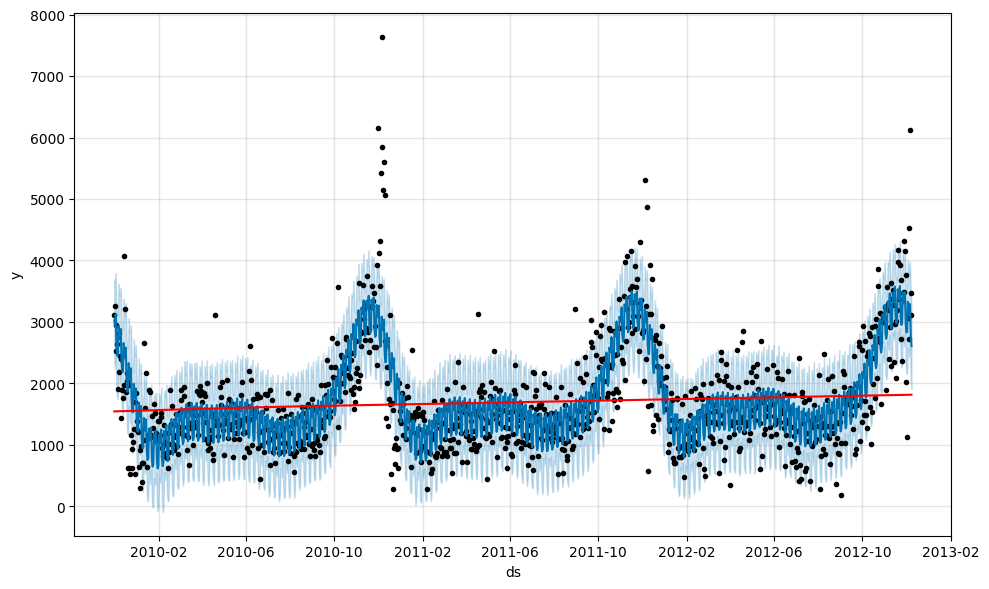

In [14]:
df = pd.read_csv('../data/online_retail.csv')
df.columns = ['ds', 'y']

model = Prophet(yearly_seasonality=4)
model.fit(df)
forecast = model.predict() # no future
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [3]:
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days',
                         parallel='processes')

08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] done processing
08:57:47 - cmdstanpy - INFO - Chain [1] start processing
08:57:47 - cmdstanpy - INFO - Chain [1]

In [14]:
df['ds'].min(), df['ds'].max()

('2009-12-01', '2012-12-08')

In [10]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.040145,2092.846702,3535.216430,3702.986147,2011-12-14
1,2011-12-16,2352.144032,1650.890342,3048.953569,1229.263629,2011-12-14
2,2011-12-17,2182.193515,1460.208535,2922.380702,1325.415023,2011-12-14
3,2011-12-18,2165.280065,1449.181537,2937.756039,2739.454215,2011-12-14
4,2011-12-19,2635.974563,1973.154156,3355.165883,2699.823386,2011-12-14
...,...,...,...,...,...,...
895,2012-12-04,3108.887035,2439.385611,3855.576734,2726.403434,2012-09-09
896,2012-12-05,3024.087806,2332.822372,3653.261860,4528.532962,2012-09-09
897,2012-12-06,3174.332561,2530.713399,3864.158048,6125.495419,2012-09-09
898,2012-12-07,2673.985460,2088.189541,3381.835251,3476.642731,2012-09-09


In [9]:
df_cv['cutoff'].unique()
# df_cv['cutoff'].nunique() # 10
# shifting by period = 30 days

<DatetimeArray>
['2011-12-14 00:00:00', '2012-01-13 00:00:00', '2012-02-12 00:00:00',
 '2012-03-13 00:00:00', '2012-04-12 00:00:00', '2012-05-12 00:00:00',
 '2012-06-11 00:00:00', '2012-07-11 00:00:00', '2012-08-10 00:00:00',
 '2012-09-09 00:00:00']
Length: 10, dtype: datetime64[ns]

In [15]:
df_p = performance_metrics(df_cv)
df_p.head()

# horizon from 9 days? because rolling average
# rolling_window = 0.1 # 0.1 fraction of horizon
# In this example horizone = 30 days , rolling_window = 0.1 * horizon = 9

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,221689.055687,470.838673,379.521512,0.300744,0.232533,0.258459,0.866667
1,10 days,218189.762214,467.107870,375.206357,0.297707,0.221528,0.255972,0.877778
2,11 days,202999.297523,450.554433,368.506746,0.287959,0.201203,0.251117,0.900000
3,12 days,179289.578580,423.426001,350.876000,0.273942,0.207326,0.241009,0.933333
4,13 days,173214.791876,416.190812,344.694875,0.261096,0.189871,0.234357,0.944444


In [19]:
df_p['horizon'].min(),df_p['horizon'].max()

(Timedelta('9 days 00:00:00'), Timedelta('90 days 00:00:00'))

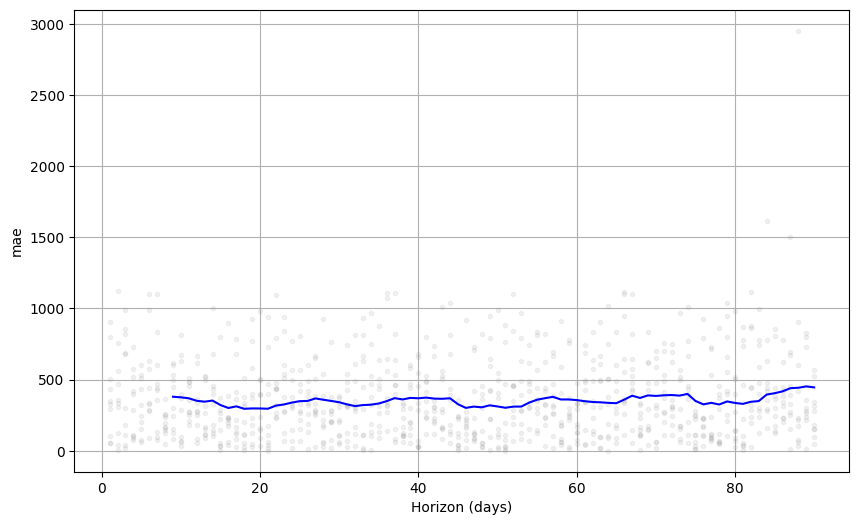

In [18]:
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

# window size = 9 , set to right edge( not center )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


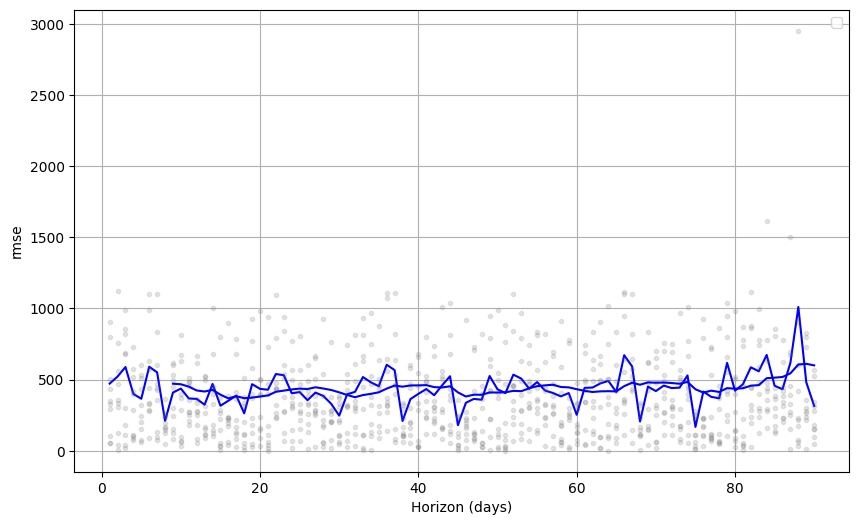

In [21]:
# Comparison of different rolling window size

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plot_cross_validation_metric(df_cv,
                             metric='rmse',
                             rolling_window=.01,
                             ax=ax)
plot_cross_validation_metric(df_cv,
                             metric='rmse',
                             rolling_window=.1,
                             ax=ax)

plt.show()

## *Handling irregular cut-offs*

In [16]:
# WPF rain fall data , accumulated on 1th, 11th, 21th of each month

df = pd.read_csv('../data/rainfall.csv')
df.columns = ['ds', 'y']

In [17]:
df

,ds,y
0,1990-01-01,1.613
1,1990-01-11,1.557
2,1990-01-21,2.219
3,1990-02-01,4.788
4,1990-02-11,6.510
...,...,...
1073,2019-11-11,6.737
1074,2019-11-21,5.216
1075,2019-12-01,2.022
1076,2019-12-11,1.780


In [24]:
# training model
model = Prophet(yearly_seasonality=4)
model.fit(df)

13:52:26 - cmdstanpy - INFO - Chain [1] start processing
13:52:26 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future = model.make_future_dataframe(periods=365 * 5)
future.iloc[-365*5:-365*5 + 40]

,ds
1078,2019-12-22
1079,2019-12-23
1080,2019-12-24
1081,2019-12-25
1082,2019-12-26
1083,2019-12-27
1084,2019-12-28
1085,2019-12-29
1086,2019-12-30
1087,2019-12-31


In [31]:
future = future[future['ds'].dt.day.isin([1, 11, 21])]
# future.iloc[-365*5:-365*5 + 40]
future

,ds
0,1990-01-01
1,1990-01-11
2,1990-01-21
3,1990-02-01
4,1990-02-11
...,...
2854,2024-11-01
2864,2024-11-11
2874,2024-11-21
2884,2024-12-01


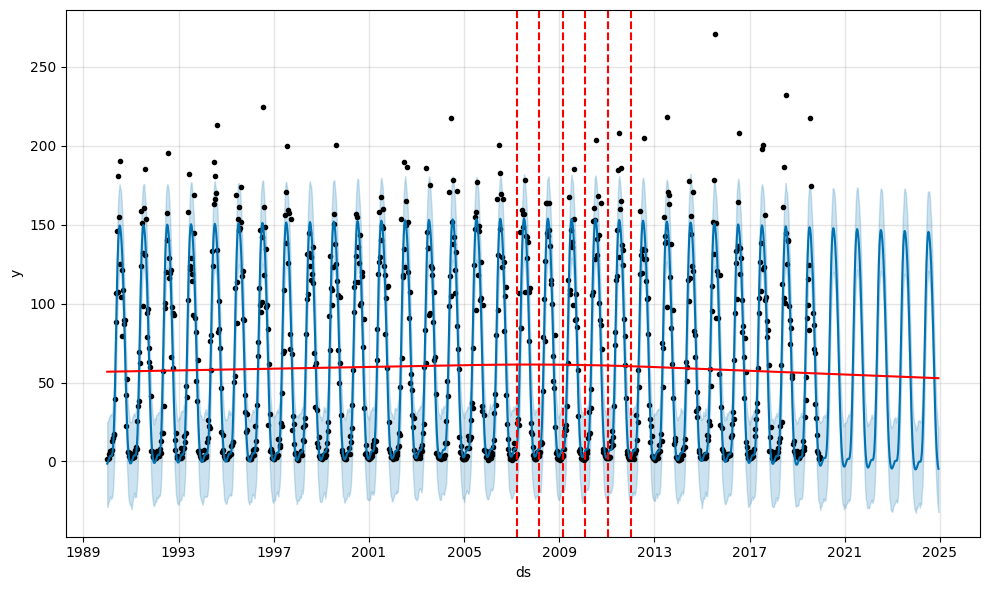

In [32]:
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] done processing
16:40:00 - cmdstanpy - INFO - Chain [1] start processing
16:40:00 - cmdstanpy - INFO - Chain [1]

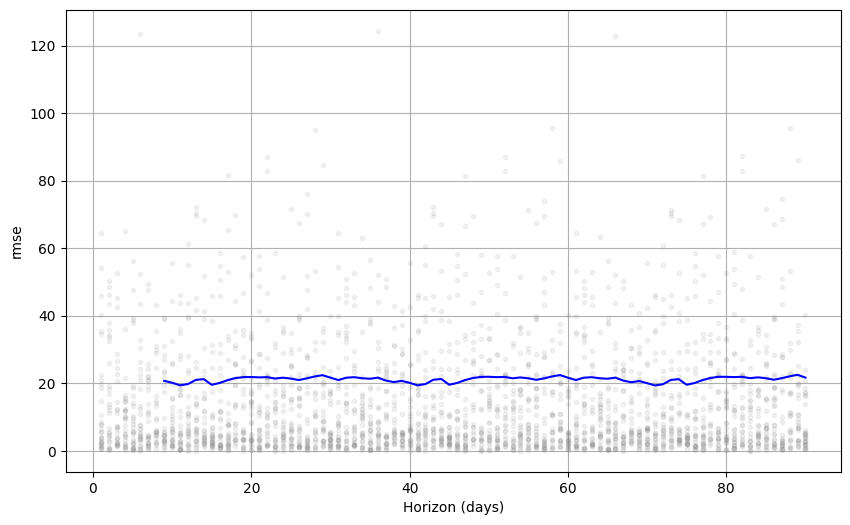

In [33]:
# cross validation , metric plot
# see next cells to know about 'df_cv'

df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='1826 days',
                         parallel='processes')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [34]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1995-01-11,4.714666,-21.167177,32.080463,1.372,1995-01-01
1,1995-01-21,5.788492,-21.042811,32.750194,2.707,1995-01-01
2,1995-02-01,7.477419,-18.235281,31.879552,4.237,1995-01-01
3,1995-02-11,9.123312,-18.375198,33.620393,5.242,1995-01-01
4,1995-02-21,10.399024,-15.466615,36.077413,3.286,1995-01-01
...,...,...,...,...,...,...
2669,2019-11-11,12.809994,-11.898727,39.920626,6.737,2019-09-22
2670,2019-11-21,5.592611,-20.118358,30.847883,5.216,2019-09-22
2671,2019-12-01,0.982536,-25.828552,28.406935,2.022,2019-09-22
2672,2019-12-11,-1.590188,-25.888155,26.210214,1.780,2019-09-22


In [36]:
df_cv['cutoff'].unique()

<DatetimeArray>
['1995-01-01 00:00:00', '1995-01-31 00:00:00', '1995-03-02 00:00:00',
 '1995-04-01 00:00:00', '1995-05-01 00:00:00', '1995-05-31 00:00:00',
 '1995-06-30 00:00:00', '1995-07-30 00:00:00', '1995-08-29 00:00:00',
 '1995-09-28 00:00:00',
 ...
 '2018-12-26 00:00:00', '2019-01-25 00:00:00', '2019-02-24 00:00:00',
 '2019-03-26 00:00:00', '2019-04-25 00:00:00', '2019-05-25 00:00:00',
 '2019-06-24 00:00:00', '2019-07-24 00:00:00', '2019-08-23 00:00:00',
 '2019-09-22 00:00:00']
Length: 302, dtype: datetime64[ns]

In [35]:
# cut-off : '1995-01-01'
# horizon : 90 days

df_cv[ df_cv['cutoff'] == '1995-01-01' ]['ds']

0   1995-01-11
1   1995-01-21
2   1995-02-01
3   1995-02-11
4   1995-02-21
5   1995-03-01
6   1995-03-11
7   1995-03-21
8   1995-04-01
Name: ds, dtype: datetime64[ns]

In [37]:
cutoffs = [pd.Timestamp('{}-{}-{}'.format(year, month, day))
           for year in range(2005, 2019)
           for month in range(1, 13)
           for day in [1, 11, 21]]

In [38]:
cutoffs

[Timestamp('2005-01-01 00:00:00'),
 Timestamp('2005-01-11 00:00:00'),
 Timestamp('2005-01-21 00:00:00'),
 Timestamp('2005-02-01 00:00:00'),
 Timestamp('2005-02-11 00:00:00'),
 Timestamp('2005-02-21 00:00:00'),
 Timestamp('2005-03-01 00:00:00'),
 Timestamp('2005-03-11 00:00:00'),
 Timestamp('2005-03-21 00:00:00'),
 Timestamp('2005-04-01 00:00:00'),
 Timestamp('2005-04-11 00:00:00'),
 Timestamp('2005-04-21 00:00:00'),
 Timestamp('2005-05-01 00:00:00'),
 Timestamp('2005-05-11 00:00:00'),
 Timestamp('2005-05-21 00:00:00'),
 Timestamp('2005-06-01 00:00:00'),
 Timestamp('2005-06-11 00:00:00'),
 Timestamp('2005-06-21 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2005-07-11 00:00:00'),
 Timestamp('2005-07-21 00:00:00'),
 Timestamp('2005-08-01 00:00:00'),
 Timestamp('2005-08-11 00:00:00'),
 Timestamp('2005-08-21 00:00:00'),
 Timestamp('2005-09-01 00:00:00'),
 Timestamp('2005-09-11 00:00:00'),
 Timestamp('2005-09-21 00:00:00'),
 Timestamp('2005-10-01 00:00:00'),
 Timestamp('2005-10-

16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing
16:59:21 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1]

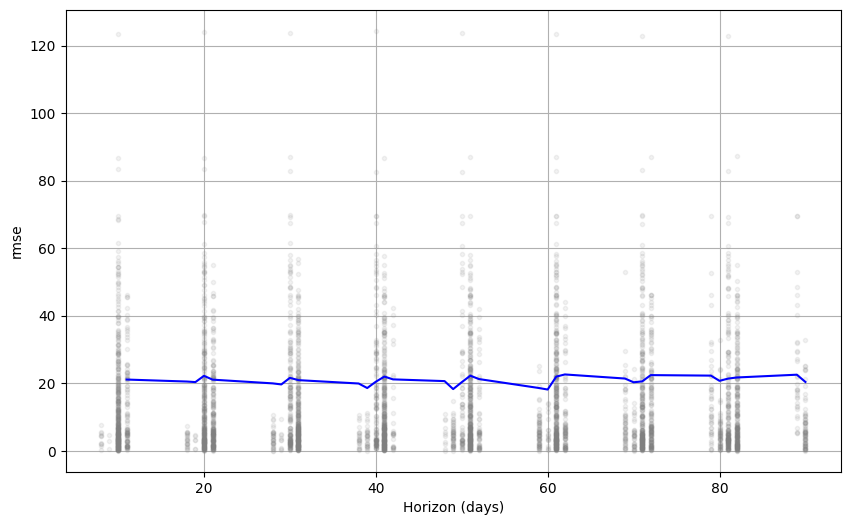

In [39]:
df_cv = cross_validation(model,
                         horizon='90 days',
                         parallel='processes',
                         cutoffs=cutoffs)
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [40]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-01-11,3.430872,-22.675000,31.033543,1.475,2005-01-01
1,2005-01-21,5.093496,-21.970285,32.288574,2.172,2005-01-01
2,2005-02-01,7.151138,-18.784121,31.763374,2.166,2005-01-01
3,2005-02-11,8.481662,-19.254863,33.190786,8.270,2005-01-01
4,2005-02-21,8.813170,-17.272044,34.714113,3.762,2005-01-01
...,...,...,...,...,...,...
4135,2019-02-11,4.632090,-21.907954,33.032729,4.915,2018-12-21
4136,2019-02-21,5.045089,-21.488872,32.007778,3.442,2018-12-21
4137,2019-03-01,5.011575,-21.556007,31.703084,5.290,2018-12-21
4138,2019-03-11,5.044592,-19.890134,31.799058,4.534,2018-12-21


## *Tuning hyperparameters with grid search*

In [2]:
param_grid = {'changepoint_prior_scale': [0.5, 0.1, 0.01, 0.001],
              'seasonality_prior_scale': [10.0, 1.0, 0.1, 0.01],
              'seasonality_mode': ['additive', 'multiplicative']}

In [7]:
# Note : itertools.product usage , https://seu11ee.tistory.com/5
"""
from itertools import product

l1 = ['A', 'B']
l2 = ['1', '2']

for i in product(l1,l2,repeat=1): #l1과 l2의 모든 쌍을 지어 리턴한다
	print(i)

'''
출력결과:
('A', '1')
('A', '2')
('B', '1')
('B', '2')
"""

"\nfrom itertools import product\n\nl1 = ['A', 'B']\nl2 = ['1', '2']\n\nfor i in product(l1,l2,repeat=1): #l1과 l2의 모든 쌍을 지어 리턴한다\n\tprint(i)\n\n'''\n출력결과:\n('A', '1')\n('A', '2')\n('B', '1')\n('B', '2')\n"

In [4]:
param_grid.values()

dict_values([[0.5, 0.1, 0.01, 0.001], [10.0, 1.0, 0.1, 0.01], ['additive', 'multiplicative']])

In [8]:
import itertools
for value in itertools.product(*param_grid.values()): # repeat = 1
    print(value)

(0.5, 10.0, 'additive')
(0.5, 10.0, 'multiplicative')
(0.5, 1.0, 'additive')
(0.5, 1.0, 'multiplicative')
(0.5, 0.1, 'additive')
(0.5, 0.1, 'multiplicative')
(0.5, 0.01, 'additive')
(0.5, 0.01, 'multiplicative')
(0.1, 10.0, 'additive')
(0.1, 10.0, 'multiplicative')
(0.1, 1.0, 'additive')
(0.1, 1.0, 'multiplicative')
(0.1, 0.1, 'additive')
(0.1, 0.1, 'multiplicative')
(0.1, 0.01, 'additive')
(0.1, 0.01, 'multiplicative')
(0.01, 10.0, 'additive')
(0.01, 10.0, 'multiplicative')
(0.01, 1.0, 'additive')
(0.01, 1.0, 'multiplicative')
(0.01, 0.1, 'additive')
(0.01, 0.1, 'multiplicative')
(0.01, 0.01, 'additive')
(0.01, 0.01, 'multiplicative')
(0.001, 10.0, 'additive')
(0.001, 10.0, 'multiplicative')
(0.001, 1.0, 'additive')
(0.001, 1.0, 'multiplicative')
(0.001, 0.1, 'additive')
(0.001, 0.1, 'multiplicative')
(0.001, 0.01, 'additive')
(0.001, 0.01, 'multiplicative')


In [9]:
param_grid.keys()

dict_keys(['changepoint_prior_scale', 'seasonality_prior_scale', 'seasonality_mode'])

In [10]:
# A parameter
dict(zip(['changepoint_prior_scale', 'seasonality_prior_scale', 'seasonality_mode'], (0.5, 10.0, 'additive'))),

{'changepoint_prior_scale': 0.5,
 'seasonality_prior_scale': 10.0,
 'seasonality_mode': 'additive'}

In [11]:
import numpy as np
import itertools

all_params = [dict(zip(param_grid.keys(), value))
              for value in itertools.product(*param_grid.values())]
rmse_values= []

In [12]:
cutoffs = [pd.Timestamp('{}-{}-{}'.format(year, month, day))
           for year in range(2010, 2019)
           for month in range(1, 13)
           for day in [1, 11, 21]]

In [18]:
# Grid search with all params

# for params in all_params: # full search
for params in all_params[:2]: # for quick test
    model = Prophet(yearly_seasonality=4, **params).fit(df)
    df_cv = cross_validation(model,
                             cutoffs=cutoffs,
                             horizon='30 days',
                             parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmse_values.append(df_p['rmse'].values[0])

09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] start processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1] done processing
09:30:18 - cmdstanpy - INFO - Chain [1]

In [20]:
# results = pd.DataFrame(all_params)
results = pd.DataFrame(all_params[:2])
results['rmse'] = rmse_values
results.head()

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,rmse
0,0.5,10.0,additive,22.618942
1,0.5,10.0,multiplicative,23.052973


In [21]:
best_params = all_params[np.argmin(rmse_values)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive'}
